#Objective
Build RNN models in Keras

RNN architecture design

Tune paramters of RNN models

#Project 2
Project using RNN

You may explore new dataset or reuse RNN-1 dataset

Create and design your model

**Tune** your models by changing
*   sequence length
*   simpleRNN/LSTM layers
*   number of units
*   pretrained weigths
*   drop out rate
*   number of dense layers
*   number of units of dense layers
*   optimizer
*   learning rate
*   batch size
*   number of dense layers
*   number of units of dense layers
*   epoch
*   Use test data as validation data (increase the training data)



**Plot** the performance history of different models

**Analyze** the effect of structure/hyper-parameters of RNN

**Summarize** the best model with the best performance of test data for competition in class. The competition is based on three criteria, accuracy, timing, and code efficiency.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
import tensorflow as tf
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [ ]:
encoded_example = encoder(example)[:3].numpy()
encoded_example



array([11, 14, 34])

In [ ]:
model = tf.keras.Sequential([encoder,tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()),
output_dim=64,mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
# Use masking to handle the variable sequence lengths

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 3s 3s/step
[0.00742006]


In [ ]:
padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 65ms/step
[0.00742006]


In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer= optimizer, loss='binary_crossentropy',metrics =['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,validation_data=test_dataset,validation_steps=30)

Epoch 1/10
391/391 [==============================] - 50s 102ms/step - loss: 0.8560 - accuracy: 0.5669 - val_loss: 0.6452 - val_accuracy: 0.6344
Epoch 2/10
391/391 [==============================] - 29s 72ms/step - loss: 0.5297 - accuracy: 0.7576 - val_loss: 0.4931 - val_accuracy: 0.8057
Epoch 3/10
391/391 [==============================] - 29s 72ms/step - loss: 0.4621 - accuracy: 0.8224 - val_loss: 0.5228 - val_accuracy: 0.8328
Epoch 4/10
391/391 [==============================] - 28s 71ms/step - loss: 0.4471 - accuracy: 0.8402 - val_loss: 0.6392 - val_accuracy: 0.8432
Epoch 5/10
391/391 [==============================] - 28s 72ms/step - loss: 0.4135 - accuracy: 0.8443 - val_loss: 0.4507 - val_accuracy: 0.8375
Epoch 6/10
391/391 [==============================] - 28s 72ms/step - loss: 0.4070 - accuracy: 0.8546 - val_loss: 0.4422 - val_accuracy: 0.8422
Epoch 7/10
391/391 [==============================] - 28s 71ms/step - loss: 0.3897 - accuracy: 0.8564 - val_loss: 0.4218 - val_accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 13s 34ms/step - loss: 0.5841 - accuracy: 0.8361
Test Loss: 0.584144115447998
Test Accuracy: 0.836080014705658


(0.0, 0.8800922840833664)

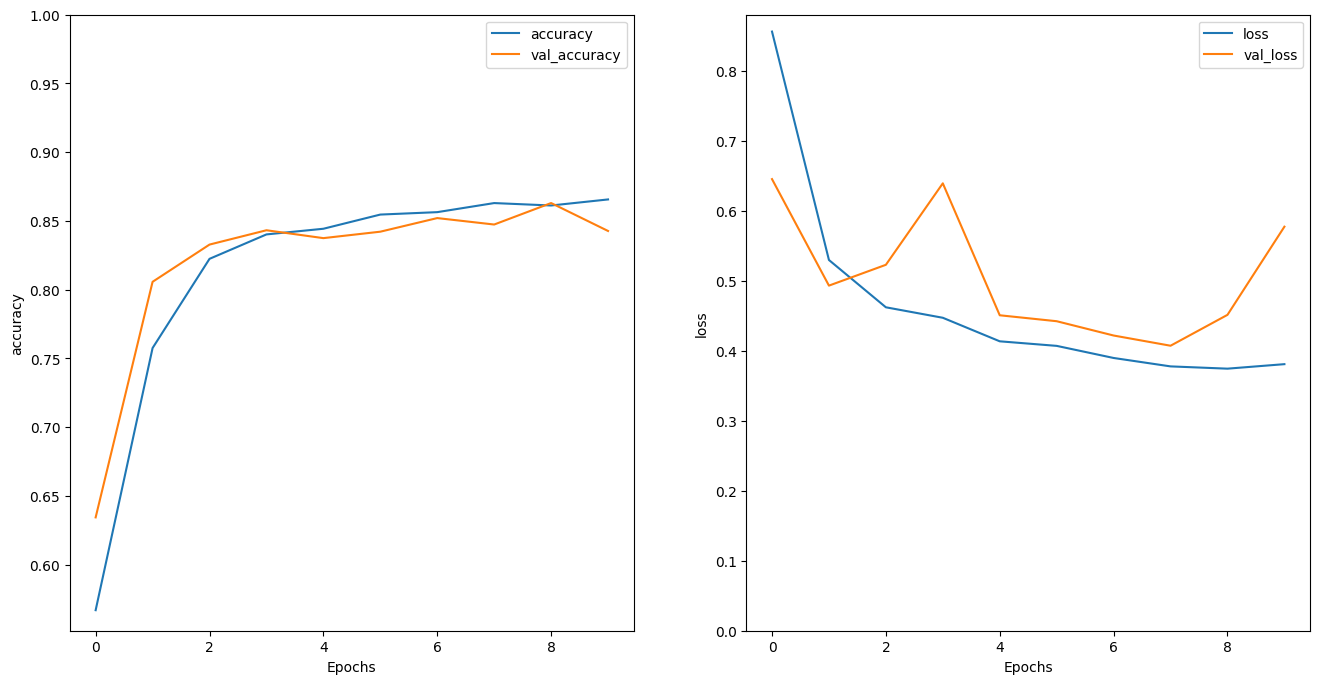

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

1/1 [==============================] - 2s 2s/step


In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
model.compile(optimizer= optimizer, loss='binary_crossentropy',metrics =['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 83s 165ms/step - loss: 0.8263 - accuracy: 0.5404 - val_loss: 0.6478 - val_accuracy: 0.6109
Epoch 2/10
391/391 [==============================] - 51s 130ms/step - loss: 0.5771 - accuracy: 0.7236 - val_loss: 0.5811 - val_accuracy: 0.7094
Epoch 3/10
391/391 [==============================] - 52s 133ms/step - loss: 0.5296 - accuracy: 0.8090 - val_loss: 0.5116 - val_accuracy: 0.8281
Epoch 4/10
391/391 [==============================] - 52s 131ms/step - loss: 0.4822 - accuracy: 0.8270 - val_loss: 0.4649 - val_accuracy: 0.8188
Epoch 5/10
391/391 [==============================] - 50s 127ms/step - loss: 0.4688 - accuracy: 0.8272 - val_loss: 0.4290 - val_accuracy: 0.8062
Epoch 6/10
391/391 [==============================] - 50s 128ms/step - loss: 0.4643 - accuracy: 0.8358 - val_loss: 0.3986 - val_accuracy: 0.8479
Epoch 7/10
391/391 [==============================] - 52s 131ms/step - loss: 0.4844 - accuracy: 0.8440 - val_loss: 0.4804 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 20s 51ms/step - loss: 0.4085 - accuracy: 0.8535
Test Loss: 0.40845194458961487
Test Accuracy: 0.8535199761390686


In [ ]:
sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

1/1 [==============================] - 5s 5s/step
[[-0.00519811]]


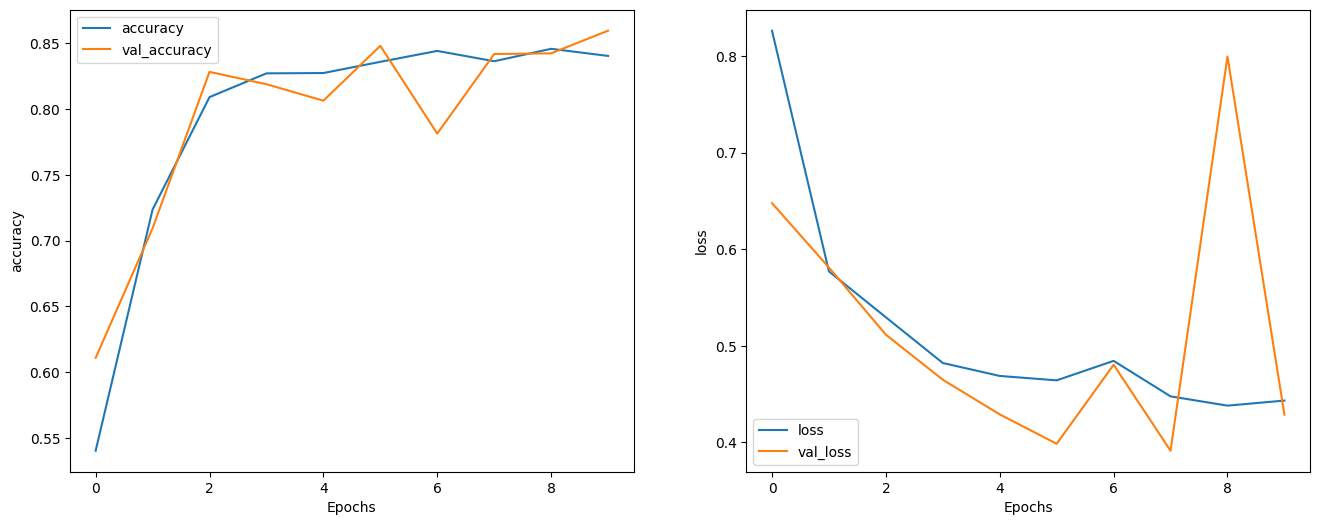

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')